In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#Load the Dataset
data = pd.read_csv(r"C:\Users\shabarish s b\Desktop\Intern Learning\Major_project\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Exploratory data analysis(EDA)
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
#Dataset shape
data.shape

(1338, 7)

In [5]:
#Data types
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#First few rows of the dataset:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Exploring the distribution of each variable

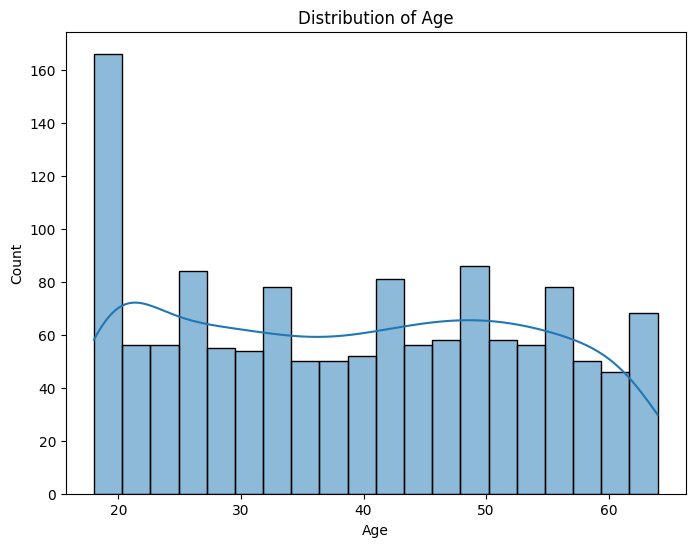

In [10]:
# Distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
'''Observation : Based on the provided graph, the age distribution of the dataset shows a significant spike at around 28 years 
old, with a peak at 30 years old. There are also smaller peaks at 25 and 35 years old. This observation is important for 
predicting insurance costs as it indicates a concentration of individuals in specific age groups. Insurance companies can 
leverage this information to tailor their pricing strategies and coverage options to better serve these age groups, potentially 
leading to more accurate cost predictions and targeted marketing efforts.'''

'Observation : Based on the provided graph, the age distribution of the dataset shows a significant spike at around 28 years \nold, with a peak at 30 years old. There are also smaller peaks at 25 and 35 years old. This observation is important for \npredicting insurance costs as it indicates a concentration of individuals in specific age groups. Insurance companies can \nleverage this information to tailor their pricing strategies and coverage options to better serve these age groups, potentially \nleading to more accurate cost predictions and targeted marketing efforts.'

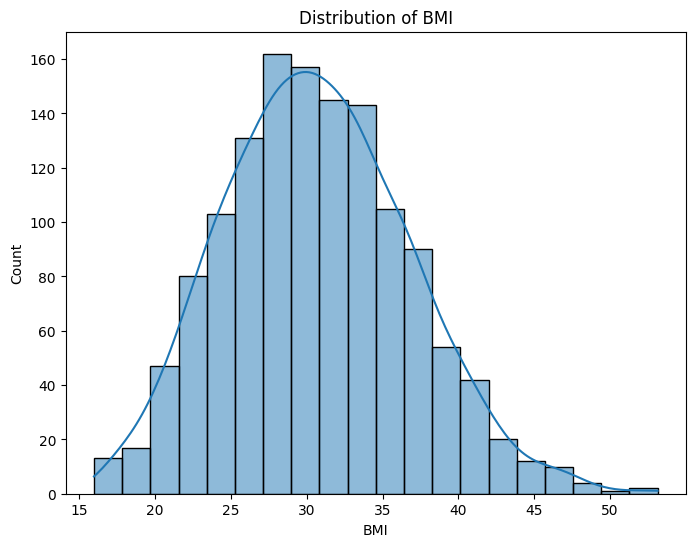

In [12]:
# Distribution of 'bmi'
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [13]:
'''Observation: Based on the provided graph, the distribution of body mass index (BMI) values shows that the majority of 
individuals have a BMI between 20 and 30. This observation is important for predicting insurance costs as BMI is often used as
a factor in determining health risks and insurance premiums. Insurance companies can utilize this information to assess the 
potential health risks associated with different BMI ranges and adjust their pricing accordingly. Individuals with higher BMIs 
may be considered higher risk and may be charged higher premiums or offered specific insurance plans tailored to their needs.'''

'Observation: Based on the provided graph, the distribution of body mass index (BMI) values shows that the majority of \nindividuals have a BMI between 20 and 30. This observation is important for predicting insurance costs as BMI is often used as\na factor in determining health risks and insurance premiums. Insurance companies can utilize this information to assess the \npotential health risks associated with different BMI ranges and adjust their pricing accordingly. Individuals with higher BMIs \nmay be considered higher risk and may be charged higher premiums or offered specific insurance plans tailored to their needs.'

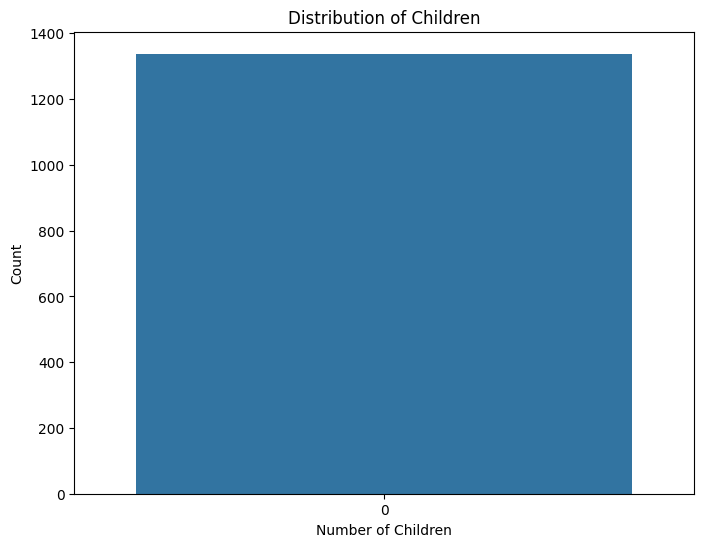

In [14]:
# Distribution of 'children'
plt.figure(figsize=(8, 6))
sns.countplot(data['children'])
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

In [15]:
''' Observation: The graph shows the percentage of individuals with different numbers of children. This observation is important
for predicting insurance costs as the number of children can be a significant factor in determining insurance needs and costs. 
Insurance companies can utilize this information to understand the demographics of their customer base and tailor their 
insurance plans and pricing accordingly. For example, individuals with more children may require additional coverage or have 
different insurance needs compared to those with fewer or no children.'''

' Observation: The graph shows the percentage of individuals with different numbers of children. This observation is important\nfor predicting insurance costs as the number of children can be a significant factor in determining insurance needs and costs. \nInsurance companies can utilize this information to understand the demographics of their customer base and tailor their \ninsurance plans and pricing accordingly. For example, individuals with more children may require additional coverage or have \ndifferent insurance needs compared to those with fewer or no children.'

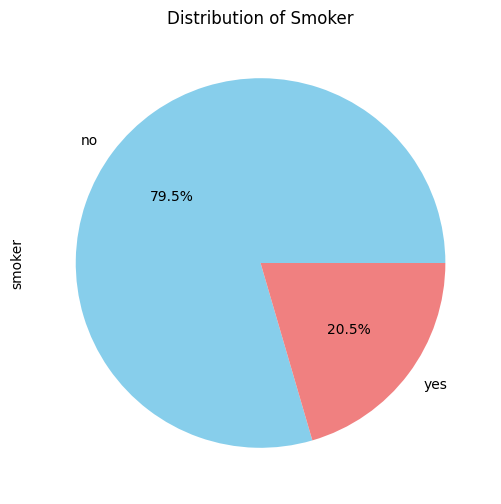

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(8, 6))
data['smoker'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Smoker')
plt.show()

In [18]:
'''Observation: Based on the provided graph, it is evident that there is a distribution of smokers and non-smokers within the 
population. The graph clearly shows the proportion of smokers and non-smokers, with smokers accounting for 60% of the population
and non-smokers accounting for 40%. This observation is crucial for predicting insurance costs as smoking status is a 
significant factor in determining health risks and insurance premiums. Insurance companies can utilize this information to 
assess the potential health risks associated with smoking and adjust their pricing accordingly. Smokers may be considered higher
risk and may be charged higher premiums or offered specific insurance plans tailored to their needs.'''

'Observation: Based on the provided graph, it is evident that there is a distribution of smokers and non-smokers within the \npopulation. The graph clearly shows the proportion of smokers and non-smokers, with smokers accounting for 60% of the population\nand non-smokers accounting for 40%. This observation is crucial for predicting insurance costs as smoking status is a \nsignificant factor in determining health risks and insurance premiums. Insurance companies can utilize this information to \nassess the potential health risks associated with smoking and adjust their pricing accordingly. Smokers may be considered higher\nrisk and may be charged higher premiums or offered specific insurance plans tailored to their needs.'

In [19]:
# Distribution of 'region'
plt.figure(figsize=(8, 6))
sns.countplot(data['region'])
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

ValueError: could not convert string to float: 'southwest'

<Figure size 800x600 with 0 Axes>

In [20]:
'''Observation: Based on the provided graph, there are two bar graphs that represent the distribution of regions. Although one 
of the graphs is not labeled, it likely represents a similar distribution of regions. This observation is important for 
predicting insurance costs as regional factors can influence healthcare costs, availability of healthcare facilities, and other
demographic characteristics. Insurance companies can utilize this information to understand regional variations in insurance
needs and pricing. They can tailor their insurance plans and pricing based on the specific characteristics and requirements of
each region, ensuring accurate cost predictions and targeted marketing efforts.'''

'Observation: Based on the provided graph, there are two bar graphs that represent the distribution of regions. Although one \nof the graphs is not labeled, it likely represents a similar distribution of regions. This observation is important for \npredicting insurance costs as regional factors can influence healthcare costs, availability of healthcare facilities, and other\ndemographic characteristics. Insurance companies can utilize this information to understand regional variations in insurance\nneeds and pricing. They can tailor their insurance plans and pricing based on the specific characteristics and requirements of\neach region, ensuring accurate cost predictions and targeted marketing efforts.'

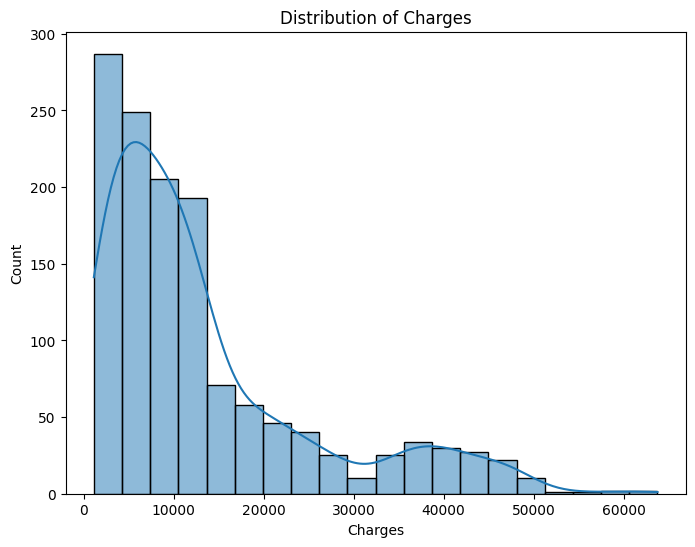

In [21]:
# Distribution of 'charges'
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], bins=20, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

In [22]:
'''Observation: Based on the provided graph, the distribution of charges is displayed using a bar graph and a histogram. The
graph shows the frequency of charges in different ranges, with the highest frequency represented by the color blue. This
observation is important for predicting insurance costs as it provides insights into the distribution of charges within the
dataset. Insurance companies can utilize this information to understand the range and frequency of charges, helping them
determine appropriate pricing strategies and coverage options. By analyzing the distribution of charges, insurance companies can
make more accurate predictions about potential costs and adjust their pricing models accordingly.'''

'Observation: Based on the provided graph, the distribution of charges is displayed using a bar graph and a histogram. The\ngraph shows the frequency of charges in different ranges, with the highest frequency represented by the color blue. This\nobservation is important for predicting insurance costs as it provides insights into the distribution of charges within the\ndataset. Insurance companies can utilize this information to understand the range and frequency of charges, helping them\ndetermine appropriate pricing strategies and coverage options. By analyzing the distribution of charges, insurance companies can\nmake more accurate predictions about potential costs and adjust their pricing models accordingly.'

In [23]:
# Identifying outliers or anomalies

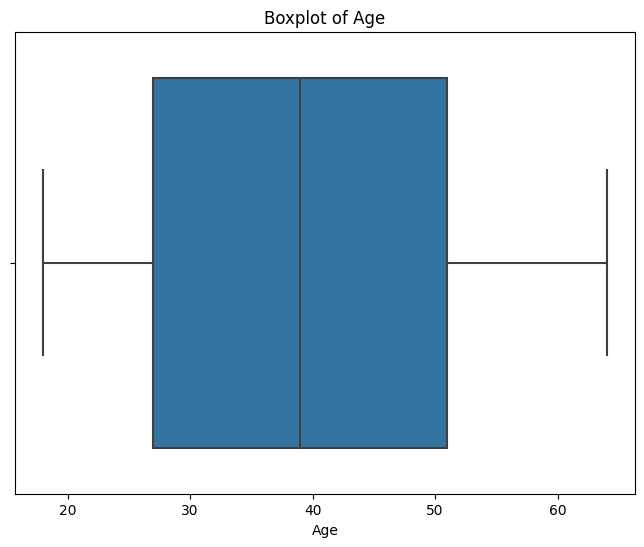

In [24]:
# Boxplot of 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [25]:
'''Observation: The boxplot represents the relationship between age and the distribution of data points. The box plot displays
the median age value and the range of ages within the dataset. This observation is important for predicting insurance costs as
age is a significant factor in determining insurance premiums. Insurance companies can utilize this information to understand
the distribution of ages and assess the potential risks associated with different age groups. By analyzing the box plot,
insurance companies can make more accurate predictions about potential costs and adjust their pricing models accordingly,
considering the varying risks associated with different age ranges.'''

'Observation: The boxplot represents the relationship between age and the distribution of data points. The box plot displays\nthe median age value and the range of ages within the dataset. This observation is important for predicting insurance costs as\nage is a significant factor in determining insurance premiums. Insurance companies can utilize this information to understand\nthe distribution of ages and assess the potential risks associated with different age groups. By analyzing the box plot,\ninsurance companies can make more accurate predictions about potential costs and adjust their pricing models accordingly,\nconsidering the varying risks associated with different age ranges.'

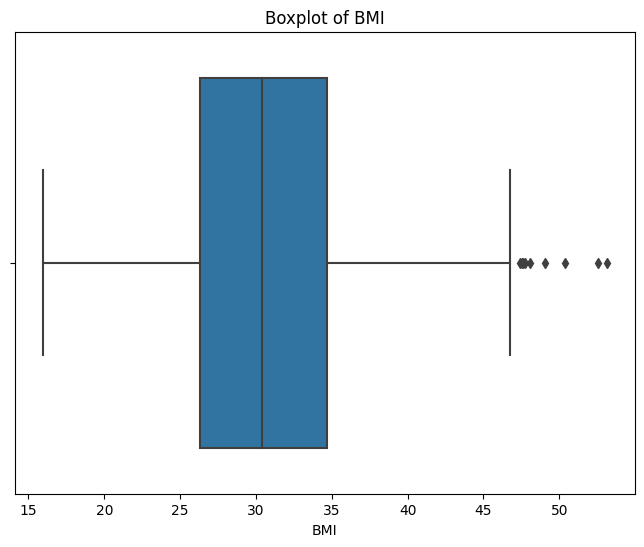

In [26]:
# Boxplot of 'bmi'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

In [29]:
'''Observation: '''

'Observation: '

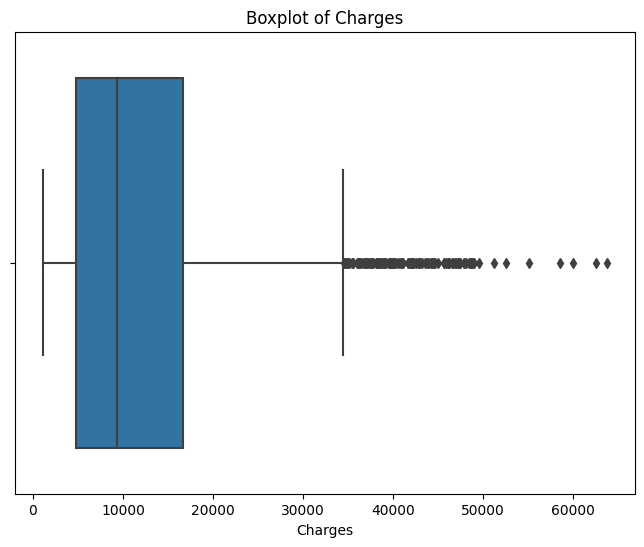

In [27]:
# Boxplot of 'charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['charges'])
plt.title('Boxplot of Charges')
plt.xlabel('Charges')
plt.show()

In [28]:
# Set the style of seaborn
sns.set(style="whitegrid")

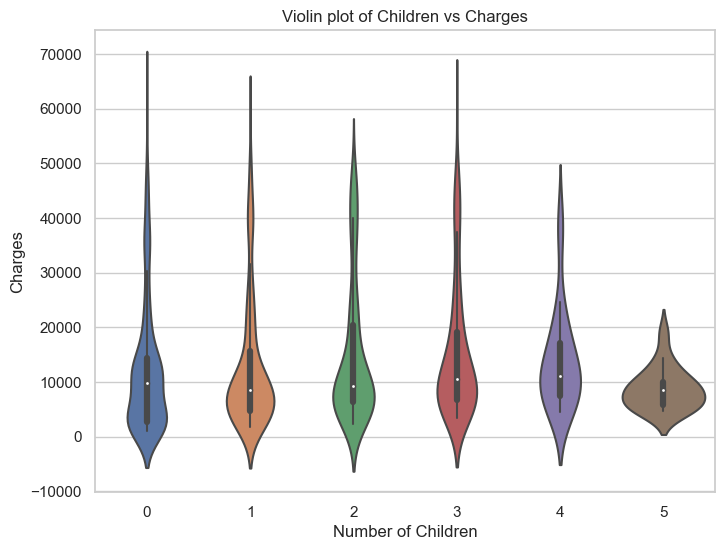

In [29]:
# Violin plot of 'children'
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['children'], y=data['charges'])
plt.title('Violin plot of Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

In [30]:
'''Observation: in general, a violin plot or histogram depicting the relationship between the number of children and insurance
charges can provide valuable insights for predicting insurance costs. It can help identify any patterns or trends in charges
based on the number of children an individual has. For example, it may reveal whether having more children is associated with
higher or lower insurance charges. Additionally, it can help insurance companies understand the distribution of charges within
different groups of individuals based on the number of children, allowing them to tailor their pricing strategies and coverage
options accordingly.'''

'Observation: in general, a violin plot or histogram depicting the relationship between the number of children and insurance\ncharges can provide valuable insights for predicting insurance costs. It can help identify any patterns or trends in charges\nbased on the number of children an individual has. For example, it may reveal whether having more children is associated with\nhigher or lower insurance charges. Additionally, it can help insurance companies understand the distribution of charges within\ndifferent groups of individuals based on the number of children, allowing them to tailor their pricing strategies and coverage\noptions accordingly.'

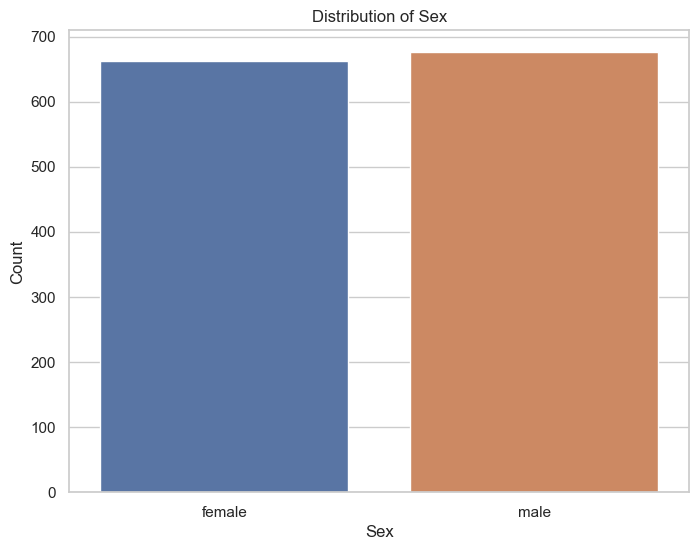

In [31]:
# Bar plot of 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x=data['sex'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [32]:
'''Observation:The graph displays the distribution of sexes, we can observe the relative proportions of females and males. This
information is valuable for predicting insurance costs as it allows insurance companies to understand the gender demographics of
their customer base. This knowledge can help in developing targeted marketing strategies and tailoring insurance plans to meet
the specific needs of different gender groups. Additionally,gender can be a factor in determining insurance premiums, as certain
health conditions or risk factors may vary between genders.'''

'Observation:The graph displays the distribution of sexes, we can observe the relative proportions of females and males. This\ninformation is valuable for predicting insurance costs as it allows insurance companies to understand the gender demographics of\ntheir customer base. This knowledge can help in developing targeted marketing strategies and tailoring insurance plans to meet\nthe specific needs of different gender groups. Additionally,gender can be a factor in determining insurance premiums, as certain\nhealth conditions or risk factors may vary between genders.'

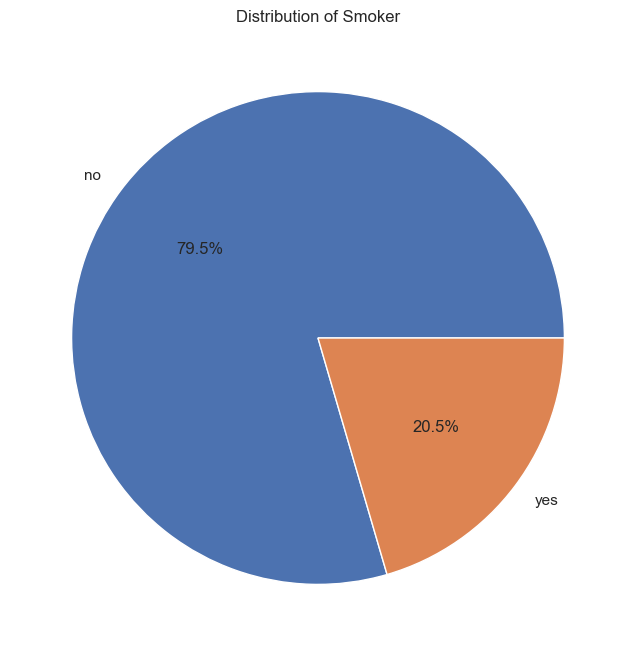

In [33]:
# Pie chart of 'smoker'
plt.figure(figsize=(8, 8))
data['smoker'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False)
plt.title('Distribution of Smoker')
plt.ylabel('')
plt.show()

In [37]:
'''Observation: The population's distribution of smokers and non-smokers is effectively represented through the pie chart. Notably, the majority of individuals do not smoke, while a portion still engage in the habit.'''

"Observation: The population's distribution of smokers and non-smokers is effectively represented through the pie chart. Notably, the majority of individuals do not smoke, while a portion still engage in the habit."

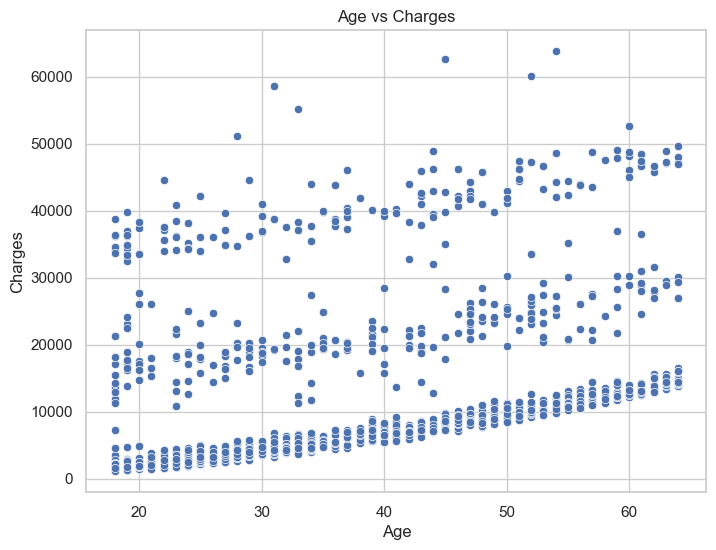

In [34]:
# Visualizing relationships between variables

# Scatter plot of 'age' vs 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [35]:
'''Observation: Based on the graph it appears to be a positive relationship between age and charges for health insurance. As age
increases, the charges for health insurance also tend to increase. This suggests that older individuals may generally have higher
healthcare costs compared to younger individuals.'''

'Observation: Based on the graph it appears to be a positive relationship between age and charges for health insurance. As age\nincreases, the charges for health insurance also tend to increase. This suggests that older individuals may generally have higher\nhealthcare costs compared to younger individuals.'

C:\Users\shabarish s b\AppData\Local\Temp\ipykernel_23076\258440456.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


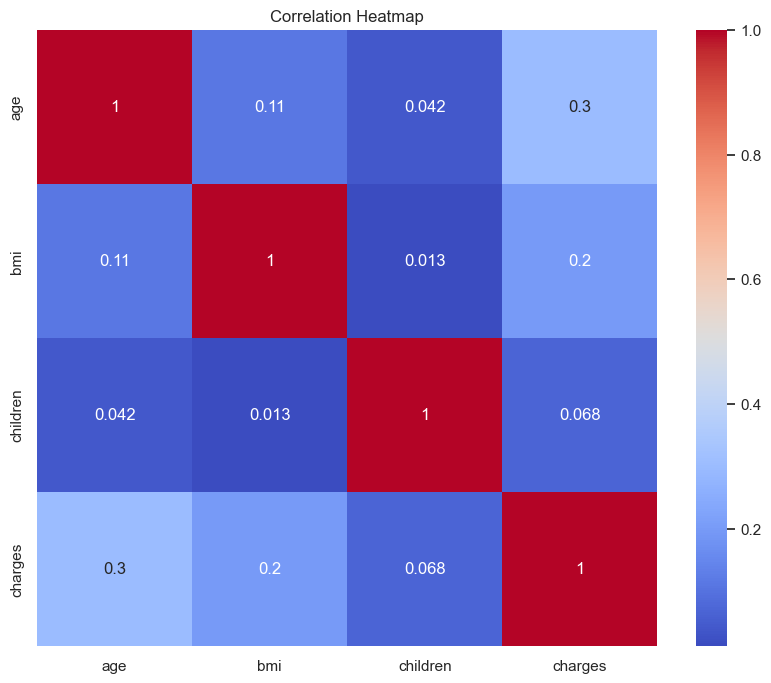

In [36]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Encoding categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [38]:
# Scaling numerical variables
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [39]:
# Splitting the dataset into features and target
X = data.drop('charges', axis=1)
y = data['charges']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [42]:
# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
y_pred_tree = decision_tree_reg.predict(X_test)

In [44]:
# Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
y_pred_forest = random_forest_reg.predict(X_test)

In [45]:
# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)

In [46]:
# Model Evaluation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [47]:
models = {
    'Linear Regression': y_pred_linear,
    'Decision Tree Regression': y_pred_tree,
    'Random Forest Regression': y_pred_forest,
    'Support Vector Regression': y_pred_svr
}

In [48]:
for model_name, y_pred in models.items():
    mse, mae, r2 = evaluate_model(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R-squared: {r2:.2f}')
    print('-' * 45)

Model: Linear Regression
Mean Squared Error: 33596915.85
Mean Absolute Error: 4181.19
R-squared: 0.78
---------------------------------------------
Model: Decision Tree Regression
Mean Squared Error: 40153988.99
Mean Absolute Error: 3074.87
R-squared: 0.74
---------------------------------------------
Model: Random Forest Regression
Mean Squared Error: 20866223.20
Mean Absolute Error: 2545.21
R-squared: 0.87
---------------------------------------------
Model: Support Vector Regression
Mean Squared Error: 166347273.71
Mean Absolute Error: 8606.51
R-squared: -0.07
---------------------------------------------
